In [28]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def euler(t,a,b):
    dt = t[2] - t[1]; #stepsize
    r = np.zeros([2,np.size(t)]); #Position
    p = np.zeros([2,np.size(t)]); #Momentum
    r[:,0] = a; #initial conditions
    p[:,0] = b;
    for i in range(np.size(t)-1):
        r[:,i+1] = r[:,i] + dt*1*p[:,i];
        p[:,i+1] = p[:,i] + dt*(-1/(np.linalg.norm(r[:,i])**3))*r[:,i];
    return p,r

def leapFrog(t,a,b):
    dt = t[2] - t[1]; #stepsize
    r = np.zeros([2,np.size(t)]); #Position
    p = np.zeros([2,np.size(t)]); #Momentum
    r[:,0] = a; #initial conditions
    p[:,0] = b;
    for i in range(np.size(t)-1):
        r[:,i+1] = r[:,i] + dt*1*p[:,i];
        p[:,i+1] = p[:,i] + dt*(-1/(np.linalg.norm(r[:,i+1])**3))*r[:,i+1];
    return p,r

def reference(t):
    r = np.zeros([2,np.size(t)]); #Position
    p = np.zeros([2,np.size(t)]); #Momentum
    r[0,:] = np.cos(t); 
    r[1,:] = np.sin(t); 
    p[0,:] = -np.sin(t)
    p[1,:] = np.cos(t)
    return p,r

def get_error(numerical,reference): # if the vector is larger than 2 the other method can be used. It is slower tho.
    R = np.sqrt(numerical[0,:]**2+numerical[1,:]**2);
    Rref = np.sqrt(reference[0,:]**2+reference[1,:]**2);
    Error = np.sqrt(sum((R-Rref)**2));
    return Error 
    # Error = 0;
    # for k in range(np.size(numerical[0,:])):
    #     num = 0;
    #     ref = 0;
    #     for i in range(np.size(numerical[:,0])):
    #         num += (numerical[i,k]**2);
    #         ref += (reference[i,k]**2);
    #     num = np.sqrt(num);
    #     ref = np.sqrt(ref);
    #     Error += (num-ref)**2;
    #return np.sqrt(Error)

def findPlotLim(plot):
        # get y-axis limits of the plot
        lowx, highx = plot.get_xlim()
        lowy, highy = plot.get_ylim()
        # find the new limits
        bound = max(abs(highx),abs(lowx),abs(highy),abs(lowy))
        # set new limits
        return plot.set_xlim([-bound, bound]), plot.set_ylim([-bound, bound])


In [29]:
# Euler method
px = 1/plt.rcParams['figure.dpi'] #Define pixel for plotting later
dt1 = np.array([0.5,0.1,0.01,0.001]); #stepsize
endtimes1 = np.array([20,50,100,200]); # time period of silumation
E1 = np.zeros([np.size(endtimes1),np.size(dt1)])

fig, ax = plt.subplots(np.size(endtimes1),np.size(dt1),figsize=(2000*px, 2000*px))
for k in range(np.size(dt1)):
    for j in range(np.size(endtimes1)):
        t = np.arange(0,endtimes1[j],dt1[k]); #Time
        p,r = euler(t,[1, 0],[0, 1]); #Euler method
        pref,rref = reference(t); # Analytic solution
        E1[j][k] = get_error(r,rref); #Each row contains all time steps whereas each column contains all end times
            
        # Plotting of Orbit with Euler method
        ax[j][k].grid(True),ax[j][k],ax[j][k].set_title('$\Delta$t = '+ str(dt1[k]) + ' and ' + 'end time = '+ str(endtimes1[j]))
        ax[j][k].plot(rref[0,:],rref[1,:],label='Position Reference')
        ax[j][k].plot(r[0,:],r[1,:],label='Position Euler')
        findPlotLim(ax[j][k]); # MaKe square plots
        ax[j][k].legend(loc='upper right')
        plt.close()

In [30]:
# Leap frog method
px = 1/plt.rcParams['figure.dpi'] #Define pixel for plotting later
dt2 = np.array([0.5,0.1,0.01,0.001]); #stepsize
endtimes2 = np.array([20,50,100,200]); # time period of silumation
E2 = np.zeros([np.size(endtimes2),np.size(dt2)])

fig, ax = plt.subplots(np.size(endtimes2),np.size(dt2),figsize=(2000*px, 2000*px))
for k in range(np.size(dt2)):
    for j in range(np.size(endtimes2)):
        t = np.arange(0,endtimes2[j],dt2[k]); #Time
        p,r = leapFrog(t,[1, 0],[0, 1]); #Euler method
        pref,rref = reference(t); # Analytic solution
        E2[j][k] = get_error(r,rref); #Each row contains all time steps whereas each column contains all end times
            
        # Plotting of Orbit with Leap frog method
        ax[j][k].grid(True),ax[j][k],ax[j][k].set_title('$\Delta$t = '+ str(dt2[k]) + ' and ' + 'end time = '+ str(endtimes2[j]))
        ax[j][k].plot(rref[0,:],rref[1,:],label='Position Reference')
        ax[j][k].plot(r[0,:],r[1,:],label='Position Leap Frog')
        findPlotLim(ax[j][k]); # MaKe square plots
        ax[j][k].legend(loc='upper right')
        plt.close()

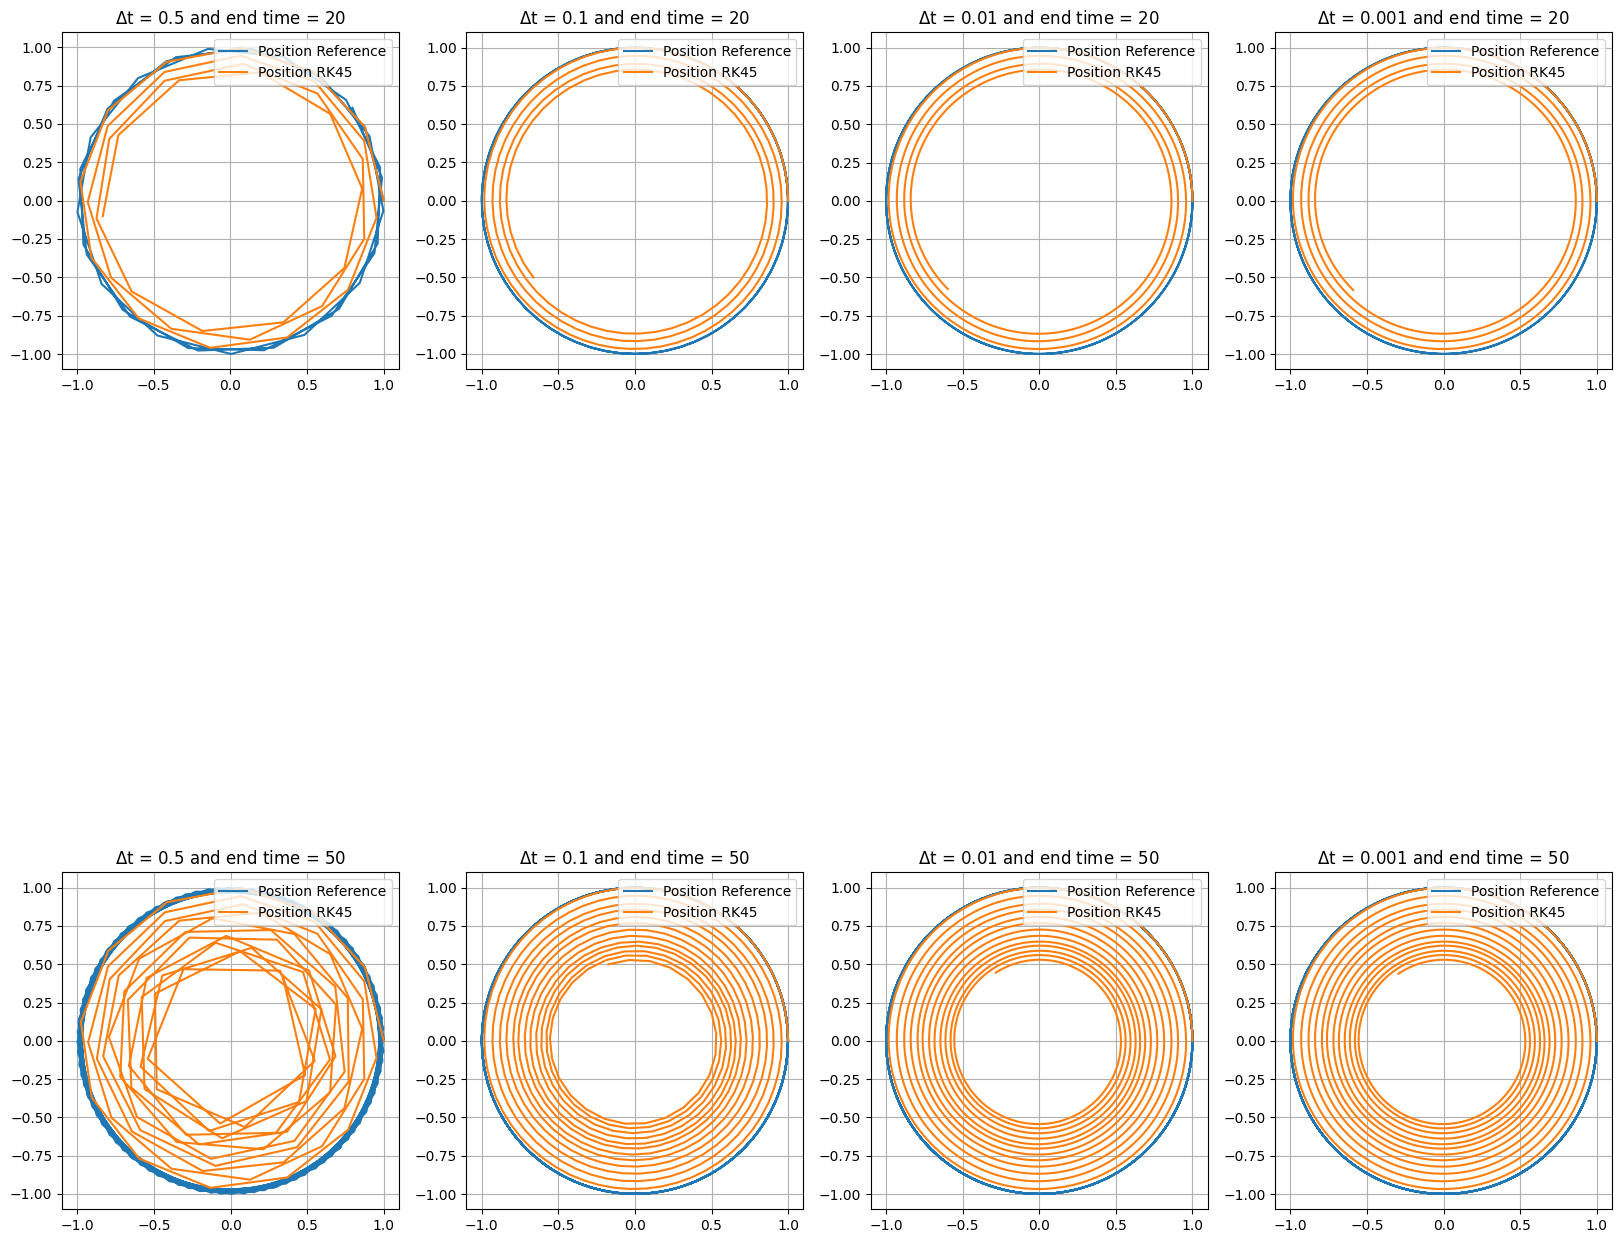

In [40]:
# RK45 method
px = 1/plt.rcParams['figure.dpi'] #Define pixel for plotting later
dt3 = np.array([0.5,0.1,0.01,0.001]); #stepsize
endtimes3 = np.array([20,50]); # time period of silumation
E3 = np.zeros([np.size(endtimes3),np.size(dt3)])

def Keplerproblem(t,y):
    rx,ry,px,py = y;
    drx = px;
    dry = py;
    dpx = -rx/(np.sqrt(rx**2+ry**2)**3);
    dpy = -ry/(np.sqrt(rx**2+ry**2)**3);
    # r = np.array([y[0],y[1]]);
    # p = np.array([y[2],y[3]]);
    # drdt = p;
    # rnorm = np.linalg.norm(r);
    # dpdt = -r/rnorm**3;
    # dpdt = np.array([dpxdt,dpydt])
    # drdt = np.array([drxdt,drydt])
    return [drx,dry,dpx,dpy]

fig, ax = plt.subplots(np.size(endtimes3),np.size(dt3),figsize=(2000*px, 2000*px))
for k in range(np.size(dt3)):
    for j in range(np.size(endtimes3)):
        t = np.arange(0,endtimes3[j],dt3[k]); #Time
        sol = solve_ivp(Keplerproblem,(0, endtimes3[j]),[1, 0, 0, 1],t_eval=t,vectorized='False'); #Euler method
        rx,ry,px,py = sol.y;
        # r,p = sol.y;
        r = np.array([rx,ry])
        p = np.array([px,py])
        pref,rref = reference(t); # Analytic solution
        E3[j][k] = get_error(r,rref); #Each row contains all time steps whereas each column contains all end times
        # Plotting of Orbit with Leap frog method
        ax[j][k].grid(True),ax[j][k],ax[j][k].set_title('$\Delta$t = '+ str(dt3[k]) + ' and ' + 'end time = '+ str(endtimes3[j]))
        ax[j][k].plot(rref[0,:],rref[1,:],label='Position Reference')
        ax[j][k].plot(r[0,:],r[1,:],label='Position RK45')
        #findPlotLim(ax[j][k]); # MaKe square plots
        ax[j][k].axis('scaled')
        ax[j][k].legend(loc='upper right')
        #plt.close()

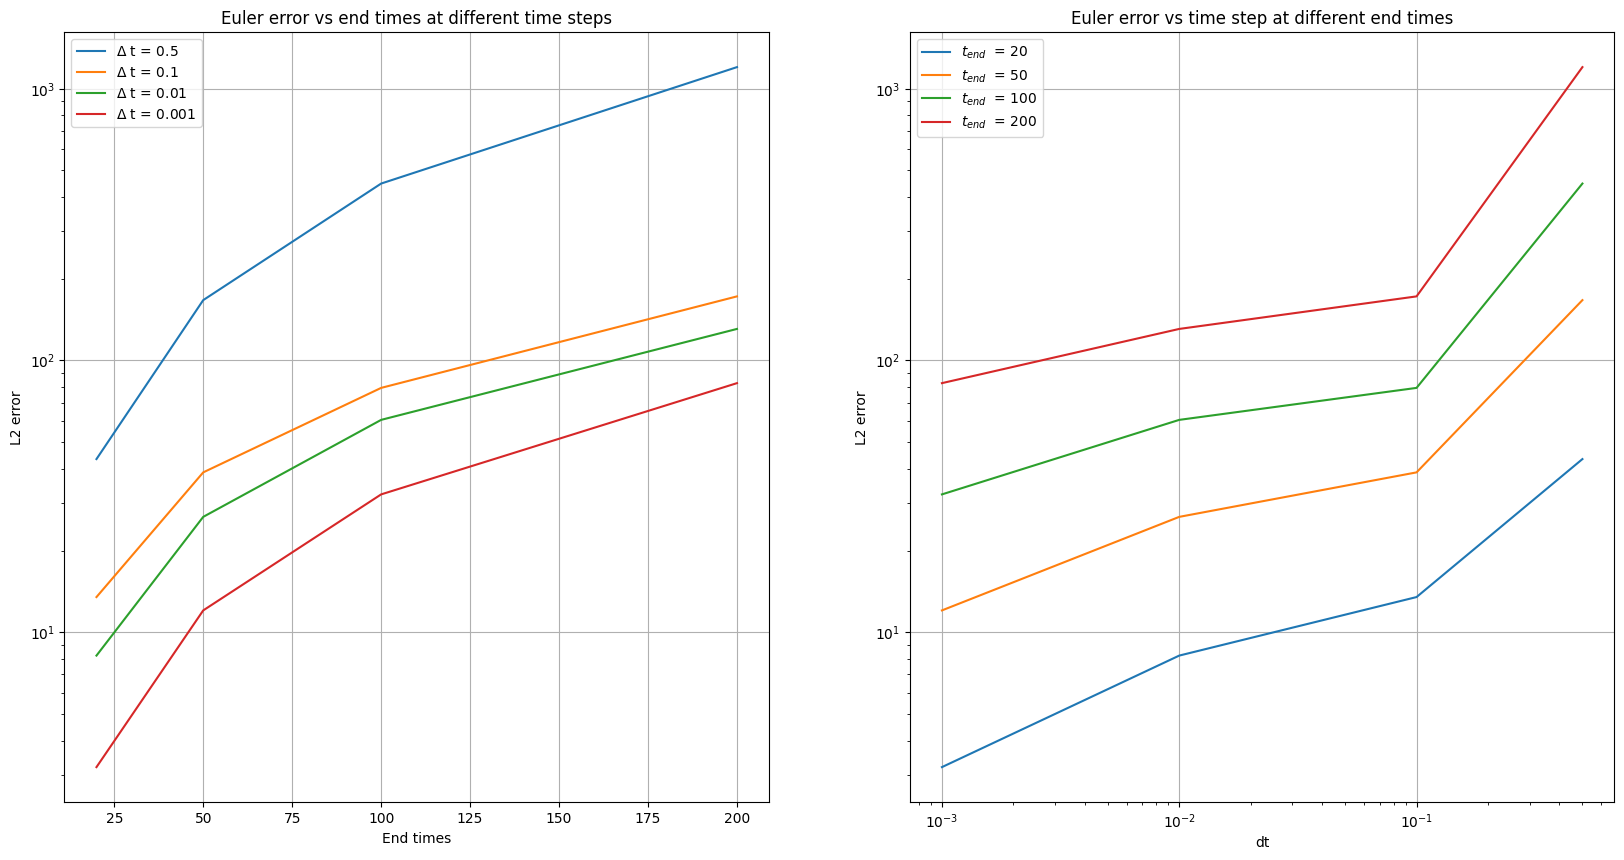

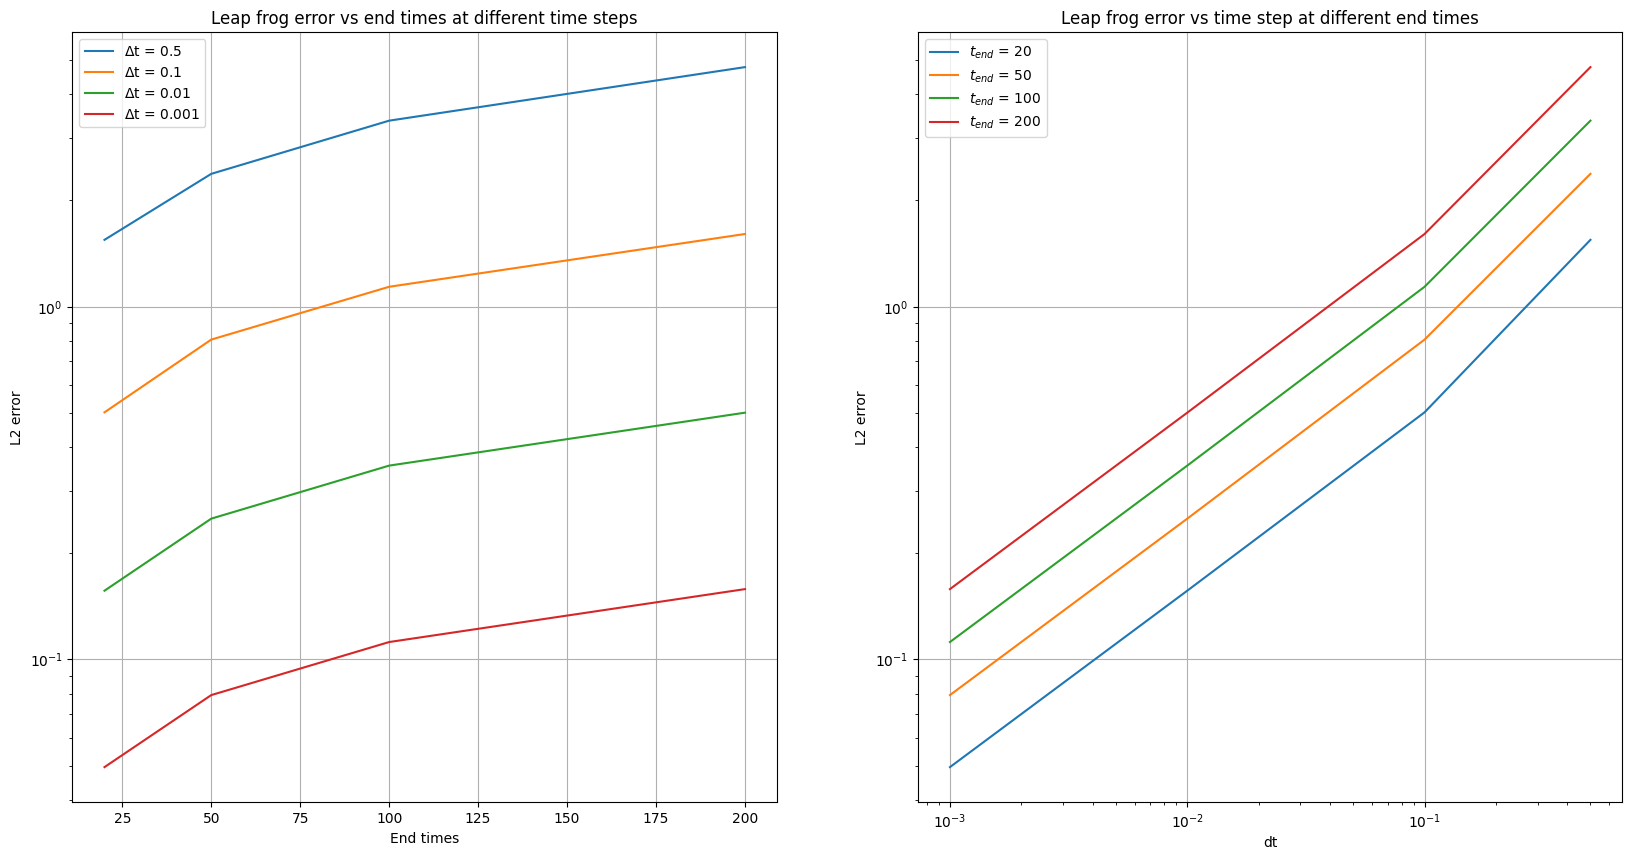

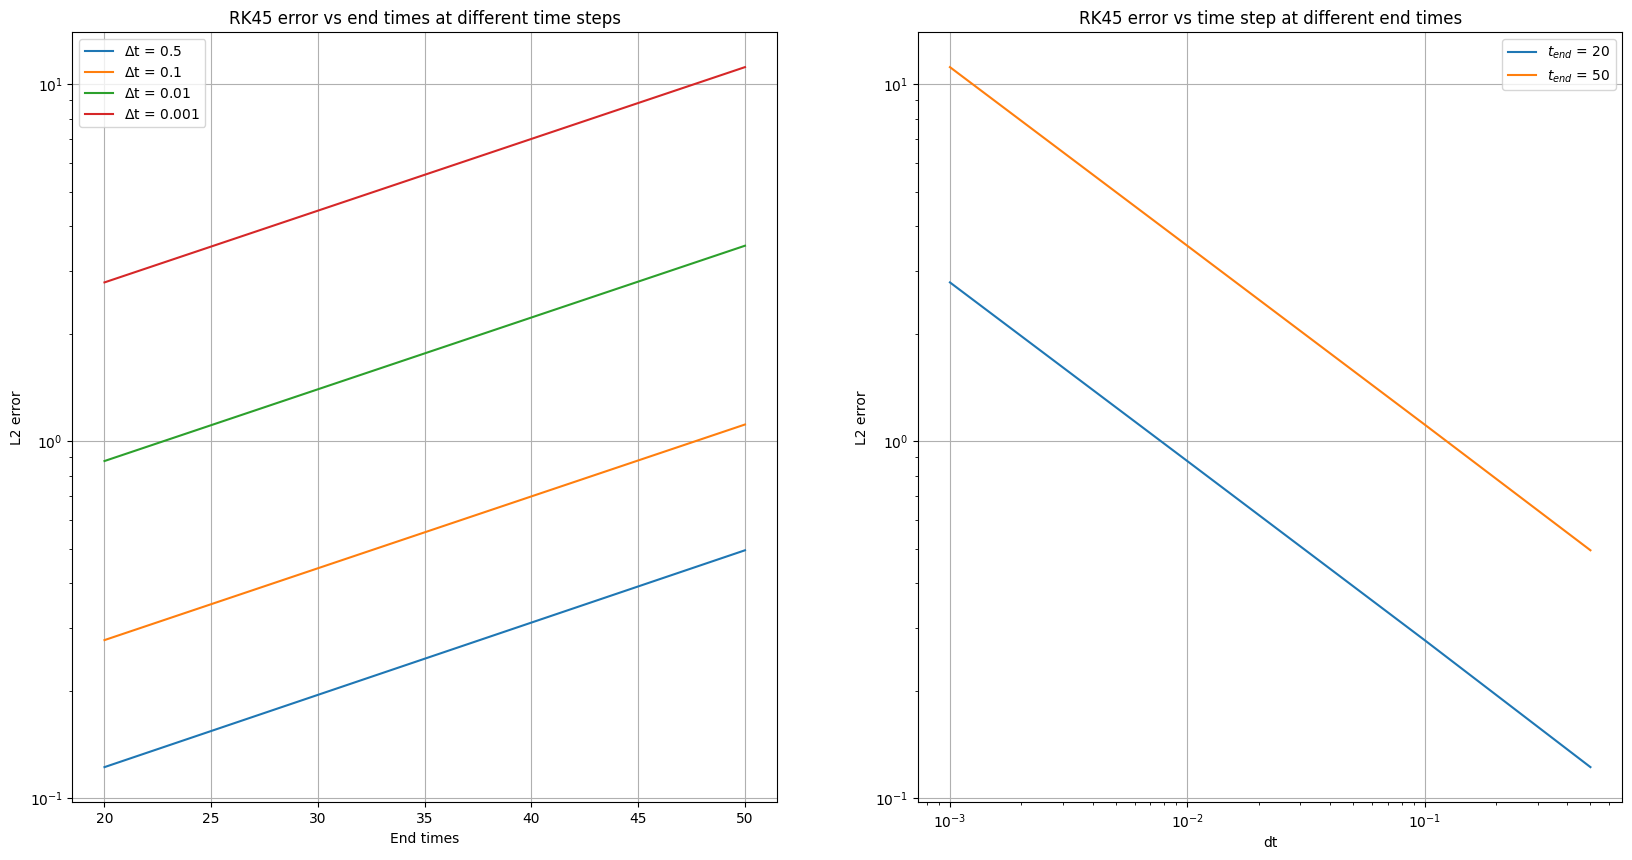

In [39]:
## Errors
# Error Euler
fig1,ax1 = plt.subplots(1,2,figsize=([20, 10]))
for i in range(np.size(dt1)):
    ax1[0].semilogy(endtimes1,E1[:,i],label='$\Delta$ t = '+str(dt1[i])),ax1[0].set_ylabel('L2 error'),ax1[0].set_xlabel('End times')
    ax1[0].grid(True),ax1[0].set_title('Euler error vs end times at different time steps'),ax1[0].legend()
for i in range(np.size(endtimes1)):
    ax1[1].loglog(dt1,E1[i,:],label='$t_{end}$  = '+str(endtimes1[i])),ax1[1].set_ylabel('L2 error'),ax1[1].set_xlabel('dt')
    ax1[1].grid(True),ax1[1].set_title('Euler error vs time step at different end times'),ax1[1].legend()

# Error Leap frog
fig2,ax2 = plt.subplots(1,2,figsize=([20, 10]))
for i in range(np.size(dt2)):
    ax2[0].semilogy(endtimes2,E2[:,i],label='$\Delta$t = '+str(dt2[i])),ax2[0].set_ylabel('L2 error'),ax2[0].set_xlabel('End times')
    ax2[0].grid(True),ax2[0].set_title('Leap frog error vs end times at different time steps'),ax2[0].legend()
for i in range(np.size(endtimes2)):
    ax2[1].loglog(dt2,E2[i,:],label='$t_{end}$ = '+str(endtimes2[i])),ax2[1].set_ylabel('L2 error'),ax2[1].set_xlabel('dt')
    ax2[1].grid(True),ax2[1].set_title('Leap frog error vs time step at different end times'),ax2[1].legend() 

# Error Runge-Kutta 45
fig3,ax3 = plt.subplots(1,2,figsize=([20, 10]))
for i in range(np.size(dt3)):
    ax3[0].semilogy(endtimes3,E3[:,i],label='$\Delta$t = '+str(dt3[i])),ax3[0].set_ylabel('L2 error'),ax3[0].set_xlabel('End times')
    ax3[0].grid(True),ax3[0].set_title('RK45 error vs end times at different time steps'),ax3[0].legend()
for i in range(np.size(endtimes3)):
    ax3[1].loglog(dt3,E3[i,:],label='$t_{end}$ = '+str(endtimes3[i])),ax3[1].set_ylabel('L2 error'),ax3[1].set_xlabel('dt')
    ax3[1].grid(True),ax3[1].set_title('RK45 error vs time step at different end times'),ax3[1].legend() 